# Problem Statement

Autonomous vehicles (AV) and intelligent transport systems (ITS) are the future of road
transport. Automatic detection of vehicles on the road in real-time is essential for vehicle
tracking, vehicle counting, and road incident response.

Analyze the usage of autopilot and its effect on road safety.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Load data file
data_filepath = "Capstone1/Part2/Tesla - Deaths.csv"
data = pd.read_csv(data_filepath)
data.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN


In [6]:
data["Year"].unique()

array([2022., 2020., 2021.,  202., 2019., 2018., 2017., 2016., 2015.,
       2014., 2013.,   nan])

In [7]:
data[data["Year"] == 202.0]

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
162,132.0,202.0,9/17/2020,USA,GA,"Car loses control, hits bus shelter",1.0,NaN,NaN,NaN,...,NaN,1,https://web.archive.org/web/20221117074935/ht...,https://web.archive.org/web/20221117074935/ht...,https://web.archive.org/web/20221117074935/ht...,NaN,NaN,NaN,NaN,NaN


In [8]:
# Since the Year value of 202.0 is incorrect, will update the year to match the Date column
data.loc[data["Year"] == 202.0, "Year"] = 2020
data[data["Year"] == 202.0]

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4


1. Preliminary Data Inspection and Cleaning

In [9]:
data.shape

(307, 24)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 24 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Case #                                                                294 non-null    float64
 1   Year                                                                  294 non-null    float64
 2   Date                                                                  294 non-null    object 
 3    Country                                                              294 non-null    object 
 4    State                                                                294 non-null    object 
 5    Description                                                          295 non-null    object 
 6    Deaths                                                               299 non-null    float64
 7  

In [11]:
#Year and Date should be datetime
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 24 columns):
 #   Column                                                                Non-Null Count  Dtype         
---  ------                                                                --------------  -----         
 0   Case #                                                                294 non-null    float64       
 1   Year                                                                  294 non-null    datetime64[ns]
 2   Date                                                                  294 non-null    datetime64[ns]
 3    Country                                                              294 non-null    object        
 4    State                                                                294 non-null    object        
 5    Description                                                          295 non-null    object        
 6    Deaths                                   

###Show null values

In [12]:
#Display count of null values in each column
data.isnull().sum()

Case #                                                                   13
Year                                                                     13
Date                                                                     13
 Country                                                                 13
 State                                                                   13
 Description                                                             12
 Deaths                                                                   8
 Tesla driver                                                            13
 Tesla occupant                                                          17
 Other vehicle                                                           12
 Cyclists/ Peds                                                          11
 TSLA+cycl / peds                                                        10
 Model                                                                   11
 Autopilot c

In [13]:
data[data['Case #'].isnull()]

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
294,NaN,NaT,NaT,NaN,NaN,NaN,92.0,28,7,29,...,3,3,Abroad,NaN,Abroad,NaN,NaN,NaN,NaN,NaN
295,NaN,NaT,NaT,NaN,NaN,NaN,261.0,89,41,101,...,16,24,USA,NaN,USA,NaN,NaN,NaN,NaN,NaN
296,NaN,NaT,NaT,NaN,NaN,NaN,353.0,117,48,130,...,19,27,Total,NaN,Total,NaN,NaN,NaN,NaN,NaN
297,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,NaT,NaT,NaN,NaN,NaN,3.0,6,5,16,...,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaT,NaT,NaN,NaN,NaN,2013.0,2014,2015,2016,...,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Delete all the rows where the Case # is null , since there are a number of columns which have null values for that row
data = data[data['Case #'].notna()]
data.isnull().sum()

Case #                                                                    0
Year                                                                      0
Date                                                                      0
 Country                                                                  0
 State                                                                    0
 Description                                                              0
 Deaths                                                                   0
 Tesla driver                                                             5
 Tesla occupant                                                           9
 Other vehicle                                                            4
 Cyclists/ Peds                                                           3
 TSLA+cycl / peds                                                         2
 Model                                                                    0
 Autopilot c

In [15]:
data.shape

(294, 24)

In [16]:
#Strip column names of spaces
data.columns = data.columns.str.strip()

In [17]:
data["Note"].unique()

array([nan,
       ' Received confirmation from family friend that it was a Tesla ',
       ' Contacted by close friend who disclosed the car was a Tesla. Awaiting further confirmation. ',
       ' AP claimed in NHTSA complaint ', ' Case ID: 91121642 ',
       ' Car model confirmed in personal correspondence ',
       ' John Renner, investigation #18119-2207 ',
       ' Twitter search for "Cruzelite" and "Tesla" confirms Joel owned a Tesla. Also had a TMC account. ',
       ' News report describes a speeding driver striking a Tesla; video footage and Copart photos of car show an unblemished Tesla missing a rear wheel, suggesting another of Tesla\'s characteristic "snap off" wheels ',
       ' In NHTSA-FARS database, CaseNum=964&StateNum=17&CaseYear=2016 '],
      dtype=object)

In [18]:
#Case #,Unnamed: 16, Unnamed: 17, Source and Deceased 1,2,3,4 to be dropped
data = data.drop(columns=['Case #','Unnamed: 16', 'Unnamed: 17', 'Source','Deceased 1','Deceased 2','Deceased 3', 'Deceased 4','Description'])
data.isnull().sum()

Year                                                                    0
Date                                                                    0
Country                                                                 0
State                                                                   0
Deaths                                                                  0
Tesla driver                                                            5
Tesla occupant                                                          9
Other vehicle                                                           4
Cyclists/ Peds                                                          3
TSLA+cycl / peds                                                        2
Model                                                                   0
Autopilot claimed                                                      18
Verified Tesla Autopilot Deaths                                         4
Verified Tesla Autopilot Deaths + All 

In [19]:
#Strip spaces in all the categorical columns values
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [20]:
#Replace all the - with -1 and nan values in the columns with 0
data = data.replace('-', -1) #For unknown
data = data.fillna(0)
data.head()

,Year,Date,Country,State,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Note
0,2022-01-01,2023-01-17,USA,CA,1.0,1,-1,-1,-1,1,-1,-1,-1,-1,0
1,2022-01-01,2023-01-07,Canada,-1,1.0,1,-1,-1,-1,1,-1,-1,-1,-1,0
2,2022-01-01,2023-01-07,USA,WA,1.0,-1,1,-1,-1,1,-1,-1,-1,-1,0
3,2022-01-01,2022-12-22,USA,GA,1.0,1,-1,-1,-1,1,-1,-1,-1,-1,0
4,2022-01-01,2022-12-19,Canada,-1,1.0,-1,-1,-1,1,1,-1,-1,-1,-1,0


In [21]:
data['Note'].unique()

array([0, 'Received confirmation from family friend that it was a Tesla',
       'Contacted by close friend who disclosed the car was a Tesla. Awaiting further confirmation.',
       'AP claimed in NHTSA complaint', 'Case ID: 91121642',
       'Car model confirmed in personal correspondence',
       'John Renner, investigation #18119-2207',
       'Twitter search for "Cruzelite" and "Tesla" confirms Joel owned a Tesla. Also had a TMC account.',
       'News report describes a speeding driver striking a Tesla; video footage and Copart photos of car show an unblemished Tesla missing a rear wheel, suggesting another of Tesla\'s characteristic "snap off" wheels',
       'In NHTSA-FARS database, CaseNum=964&StateNum=17&CaseYear=2016'],
      dtype=object)

All the Notes dont necessarily mention if the accident is caused by Tesla 

2. Exploratory Data Analysis

Perform an in-depth exploratory data analysis on the number of events by date, per year, and
per day for each state and country

In [22]:
#let us split Date in Day, Year, Month
data['Date_Day'] = data['Date'].dt.day
data['Date_Month'] = data['Date'].dt.month
data['Date_Year'] = data['Date'].dt.year


In [23]:
data.head()

,Year,Date,Country,State,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Note,Date_Day,Date_Month,Date_Year
0,2022-01-01,2023-01-17,USA,CA,1.0,1,-1,-1,-1,1,-1,-1,-1,-1,0,17,1,2023
1,2022-01-01,2023-01-07,Canada,-1,1.0,1,-1,-1,-1,1,-1,-1,-1,-1,0,7,1,2023
2,2022-01-01,2023-01-07,USA,WA,1.0,-1,1,-1,-1,1,-1,-1,-1,-1,0,7,1,2023
3,2022-01-01,2022-12-22,USA,GA,1.0,1,-1,-1,-1,1,-1,-1,-1,-1,0,22,12,2022
4,2022-01-01,2022-12-19,Canada,-1,1.0,-1,-1,-1,1,1,-1,-1,-1,-1,0,19,12,2022


In [24]:
#We can drop the Year column, since we have Date_Year column now, and Note column since is not useful for analysis
data = data.drop(columns=['Year', 'Note'])

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Date                                                                294 non-null    datetime64[ns]
 1   Country                                                             294 non-null    object        
 2   State                                                               294 non-null    object        
 3   Deaths                                                              294 non-null    float64       
 4   Tesla driver                                                        294 non-null    object        
 5   Tesla occupant                                                      294 non-null    object        
 6   Other vehicle                                                  

In [26]:
data.shape

(294, 16)

In [27]:
cols_obj = data.select_dtypes(include=['object']).columns
cols_obj

Index(['Country', 'State', 'Tesla driver', 'Tesla occupant', 'Other vehicle',
       'Cyclists/ Peds', 'TSLA+cycl / peds', 'Model', 'Autopilot claimed',
       'Verified Tesla Autopilot Deaths',
       'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'],
      dtype='object')

In [28]:
#Drop Country and State from cols_obj
cols_obj = cols_obj.drop(['Country', 'State','Model'])
cols_obj

Index(['Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Autopilot claimed',
       'Verified Tesla Autopilot Deaths',
       'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'],
      dtype='object')

In [29]:
for cols in cols_obj:
    print(f"Column: {cols}")
    print(data[cols].value_counts())
    print("\n")

Column: Tesla driver
Tesla driver
-1    172
1     117
0       5
Name: count, dtype: int64


Column: Tesla occupant
Tesla occupant
-1    242
1      39
0       9
2       3
3       1
Name: count, dtype: int64


Column: Other vehicle
Other vehicle
-1    180
1      95
2      11
0       4
3       3
4       1
Name: count, dtype: int64


Column: Cyclists/ Peds
Cyclists/ Peds
-1    247
1      42
0       3
2       2
Name: count, dtype: int64


Column: TSLA+cycl / peds
TSLA+cycl / peds
1     157
-1    111
2      20
3       3
0       2
4       1
Name: count, dtype: int64


Column: Autopilot claimed
Autopilot claimed
-1    241
1      32
0      18
2       3
Name: count, dtype: int64


Column: Verified Tesla Autopilot Deaths
Verified Tesla Autopilot Deaths
-1    274
1      13
0       4
2       3
Name: count, dtype: int64


Column: Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO
Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO
-1    269
1      21
2       3
0       

In [30]:
#Change dtypes to int32 for all cols_obj
data[cols_obj] = data[cols_obj].apply(lambda x: pd.to_numeric(x, errors='coerce').astype('int32'))

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Date                                                                294 non-null    datetime64[ns]
 1   Country                                                             294 non-null    object        
 2   State                                                               294 non-null    object        
 3   Deaths                                                              294 non-null    float64       
 4   Tesla driver                                                        294 non-null    int32         
 5   Tesla occupant                                                      294 non-null    int32         
 6   Other vehicle                                                  

In [31]:
data.head()

,Date,Country,State,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Date_Day,Date_Month,Date_Year
0,2023-01-17,USA,CA,1.0,1,-1,-1,-1,1,-1,-1,-1,-1,17,1,2023
1,2023-01-07,Canada,-1,1.0,1,-1,-1,-1,1,-1,-1,-1,-1,7,1,2023
2,2023-01-07,USA,WA,1.0,-1,1,-1,-1,1,-1,-1,-1,-1,7,1,2023
3,2022-12-22,USA,GA,1.0,1,-1,-1,-1,1,-1,-1,-1,-1,22,12,2022
4,2022-12-19,Canada,-1,1.0,-1,-1,-1,1,1,-1,-1,-1,-1,19,12,2022


In [32]:
print("Country" , data['Country'].unique())
print("State" , data['State'].unique())
print("Date_Year" , data['Date_Year'].unique())
print("Date_Month" , data['Date_Month'].unique())
print("Date_Day" , data['Date_Day'].unique())

Country ['USA' 'Canada' 'China' 'Mexico' 'UK' 'Germany' 'Finland' 'Australia'
 'Netherlands' 'Switzerland' 'France' 'Denmark' 'Belgium' 'Portugal'
 'South Korea' 'Norway' 'Taiwan' 'Slovenia' 'Austria' 'Ukraine' 'Spain'
 'Holland' 'Japan']
State ['CA' -1 'WA' 'GA' 'MO' 'AR' 'IL' 'FL' 'SC' 'MD' 'NY' 'MA' 'ME' 'UT' 'PA'
 'HA' 'AL' 'MI' 'NV' 'OR' 'AZ' 'NJ' 'CO' 'NC' 'ID' 'OH' 'IA' 'VA' 'TX'
 'IN' 'DE' 'NH' 'TN' 'HI']
Date_Year [2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013]
Date_Month [ 1 12 11 10  9  8  7  6  5  4  3  2]
Date_Day [17  7 22 19 18 11  6 28 27 26 12  5  4  9  1 16 13 30 24 23 21 20 14  2
  8  3 25 29 10 31 15]


#### Let us check the correlation between the various columns

<Axes: title={'center': 'Correlation between various columns'}>

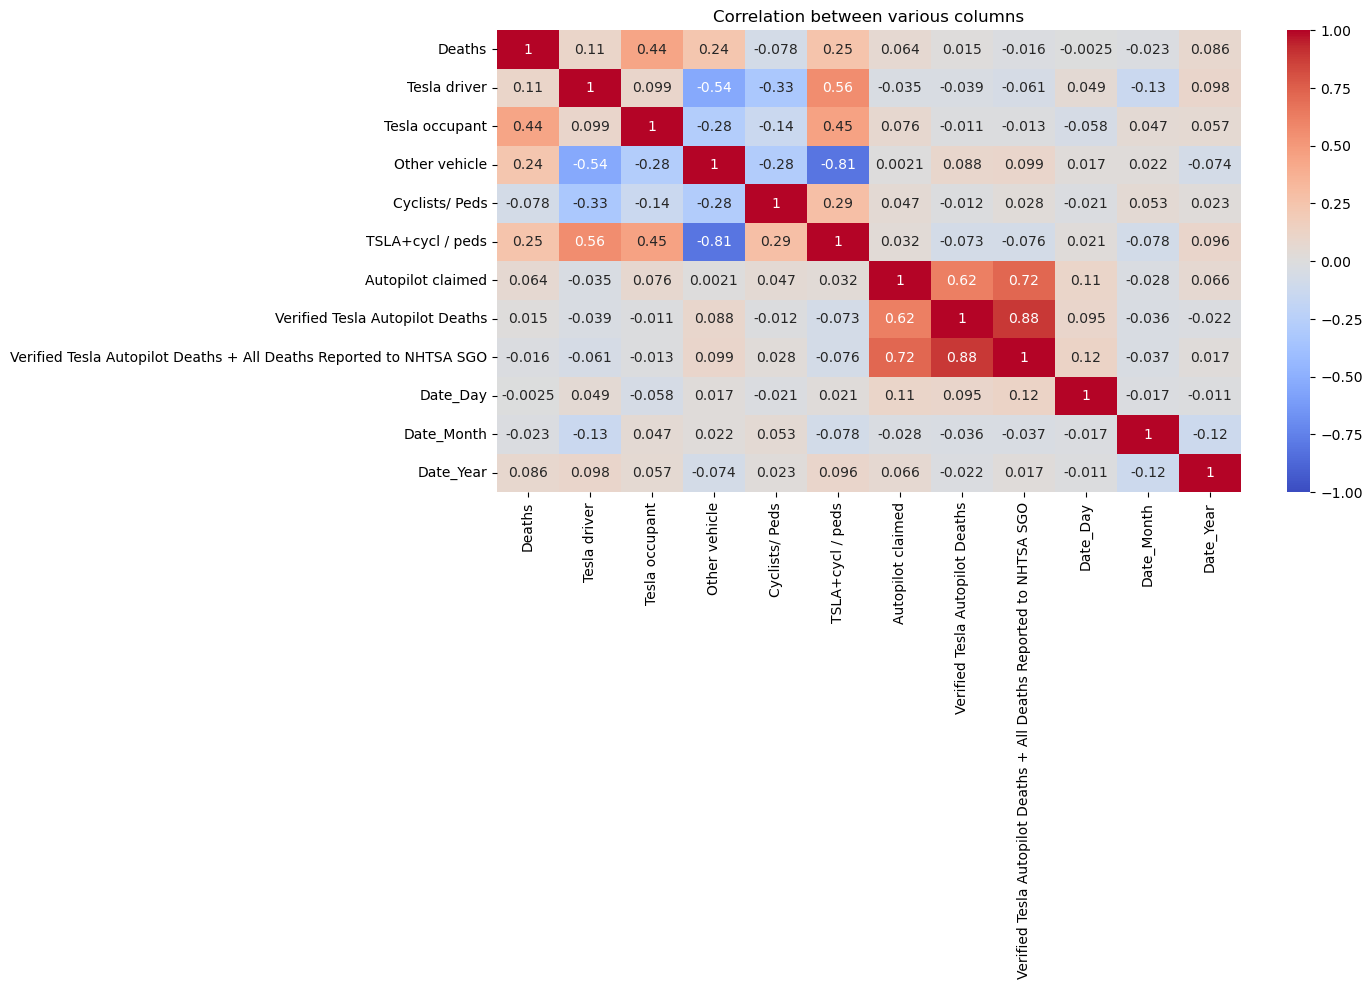

In [68]:
plt.figure(figsize=(12,6))
plt.title('Correlation between various columns')
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm',vmin=-1)

Only Verified Tesla Autopilot Deaths and Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO are highly correlated. But not enough to drop one of the columns.

In [98]:
def plot_grouped_bar(data, x,y, title, xlabel, ylabel, hue=None):
    plt.figure(figsize=(6, 4))
    sns.barplot(data=data, x=x, y=y, hue=hue)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if(hue):
        plt.legend(title=hue)
    plt.xticks(rotation=90)
    plt.show()

In [97]:
def plot_highest_lowest(data, x,y, title_high,title_low, xlabel, ylabel, hue=None):
    highest_10 = data.nlargest(10, y)
    lowest_10 = data.nsmallest(10, y)
    plt.figure(figsize=(16, 6))
    plt.subplot(121)

    sns.barplot(data=highest_10, x=x, y=y, hue=hue)
    plt.title(title_high)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if(hue):
        plt.legend(title=hue)
    plt.xticks(rotation=90)



    plt.subplot(122)
    sns.barplot(data=lowest_10, x=x, y=y, hue=hue)
    plt.title(title_low)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)   
    if(hue):
        plt.legend(title=hue)
    plt.xticks(rotation=90)

    
    plt.show()

#### Event count by Year


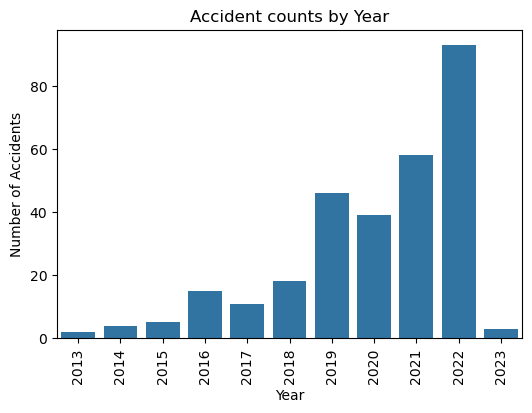

In [99]:
# Events count by Year
events_by_year = (data.groupby(['Date_Year'])
                            .size()
                            .reset_index(name='AccidentCounts')
                            .sort_values(by='Date_Year', ascending=True)
)

plot_grouped_bar(events_by_year, 'Date_Year', 'AccidentCounts', 'Accident counts by Year', 'Year', 'Number of Accidents')

As we can see above, max number of accidents occured in 2022. This has drastically reduced in 2023

#### Accidents by Day

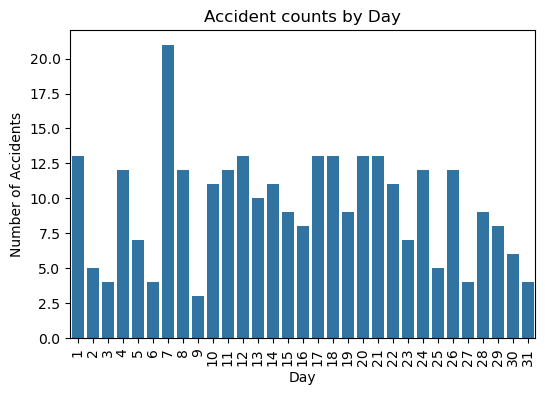

In [100]:
#Accidents by Day
# Events count by Year
events_by_day = (data.groupby(['Date_Day'])
                            .size()
                            .reset_index(name='AccidentCounts')
                            .sort_values(by='Date_Day', ascending=True)
)

plot_grouped_bar(events_by_day, 'Date_Day', 'AccidentCounts', 'Accident counts by Day', 'Day', 'Number of Accidents')

From above we can see that most accidents have happened on the 7th of the month

In [37]:
#replace state value = '-1' with 'Unknown'
data['State'] = data['State'].replace(-1, 'Unknown')


#### Accident Count by State

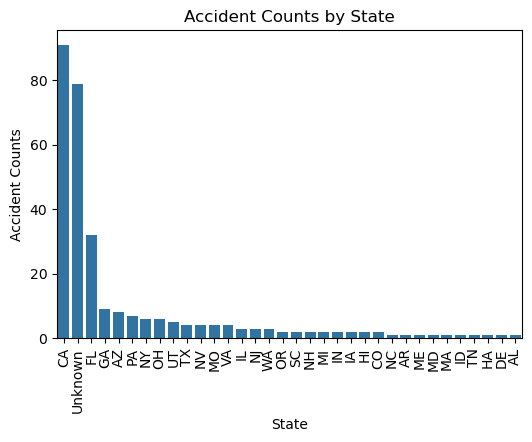

In [101]:
#Accident count by State
events_by_state = (
    data.groupby('State')
      .size()                              # counts rows per group
      .reset_index(name='AccidentCount')   # rename to readable column
      .sort_values('AccidentCount', ascending=False)
)

plot_grouped_bar(events_by_state, 'State', 'AccidentCount', 'Accident Counts by State', 'State', 'Accident Counts')


From above we can see that the maximum number of accidents occured in CA, followed by Unknown (since we dont have information about this state). This is followed by FL and so on. State with least number of accidents are NC, AR, ME, MD, MA, ID< TN, HA, DE and AL

#### Accidents by Country

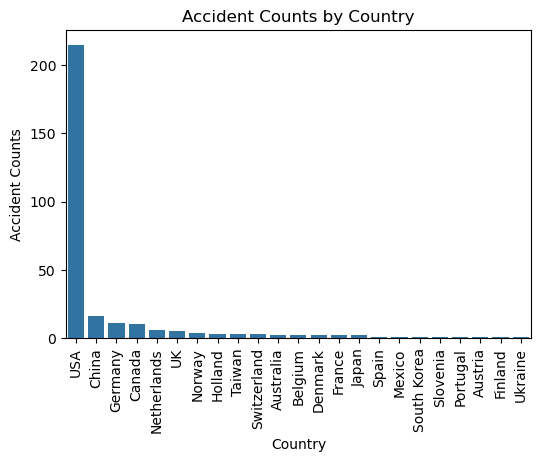

In [102]:
events_by_country = (
    data.groupby('Country')
      .size()                              # counts rows per group
      .reset_index(name='AccidentCount')   # rename to readable column
      .sort_values('AccidentCount', ascending=False)
)
plot_grouped_bar(events_by_country, 'Country', 'AccidentCount', 'Accident Counts by Country', 'Country', 'Accident Counts')

The country with the most number of accidents is USA. All other countries have comparatively very few accidents.

#### Accidents by Date, State and Country

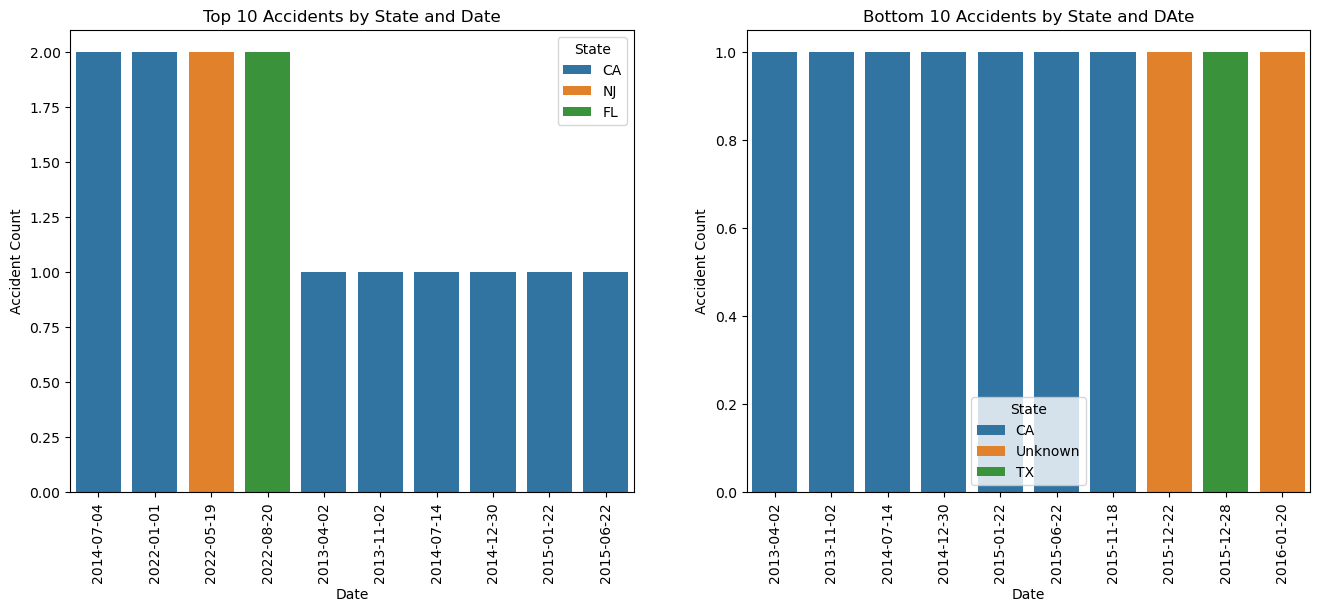

In [103]:
event_counts = data.groupby(['Date', 'Country', 'State']).size().reset_index(name='Accident_Count')
plot_highest_lowest(event_counts, 'Date', 'Accident_Count', 'Top 10 Accidents by State and Date', 'Bottom 10 Accidents by State and DAte' ,'Date', 'Accident Count','State')

From above we see that most accidents happened in CA across different dates

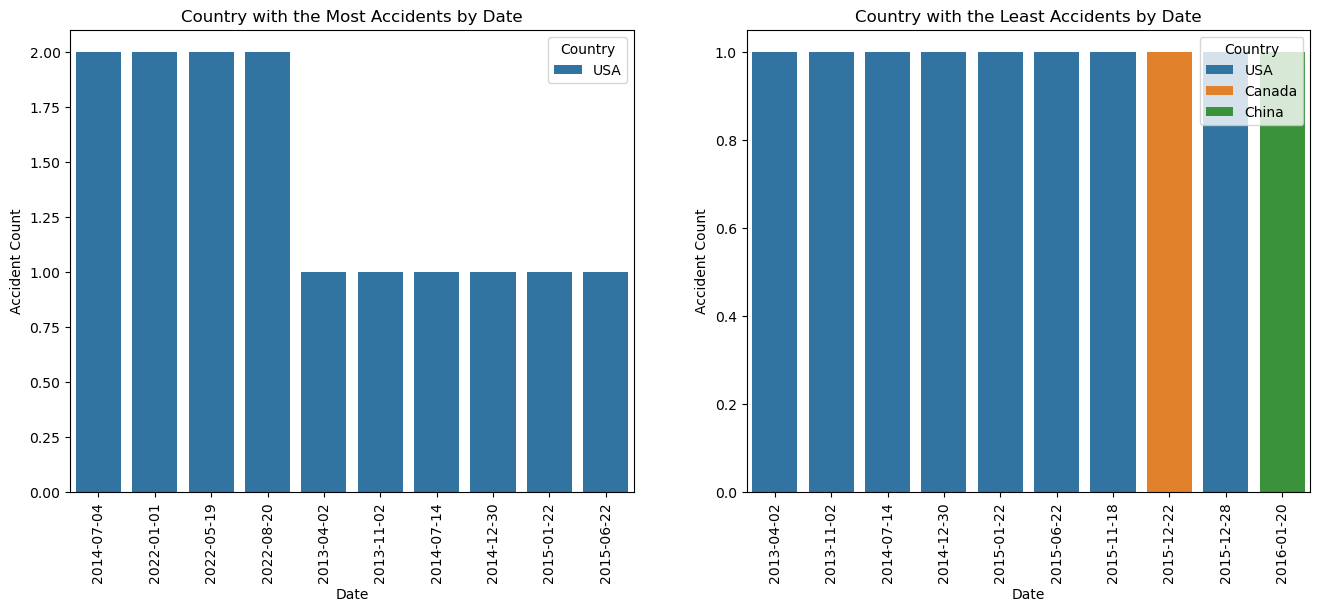

In [104]:
event_counts = data.groupby(['Date', 'Country', 'State']).size().reset_index(name='Accident_Count')
plot_highest_lowest(event_counts, 'Date', 'Accident_Count', 'Country with the Most Accidents by Date', 'Country with the Least Accidents by Date' ,'Date', 'Accident Count','Country')


From above we can see that USA is a country with most and least number of accidents. Other countries in this category are Canada and China

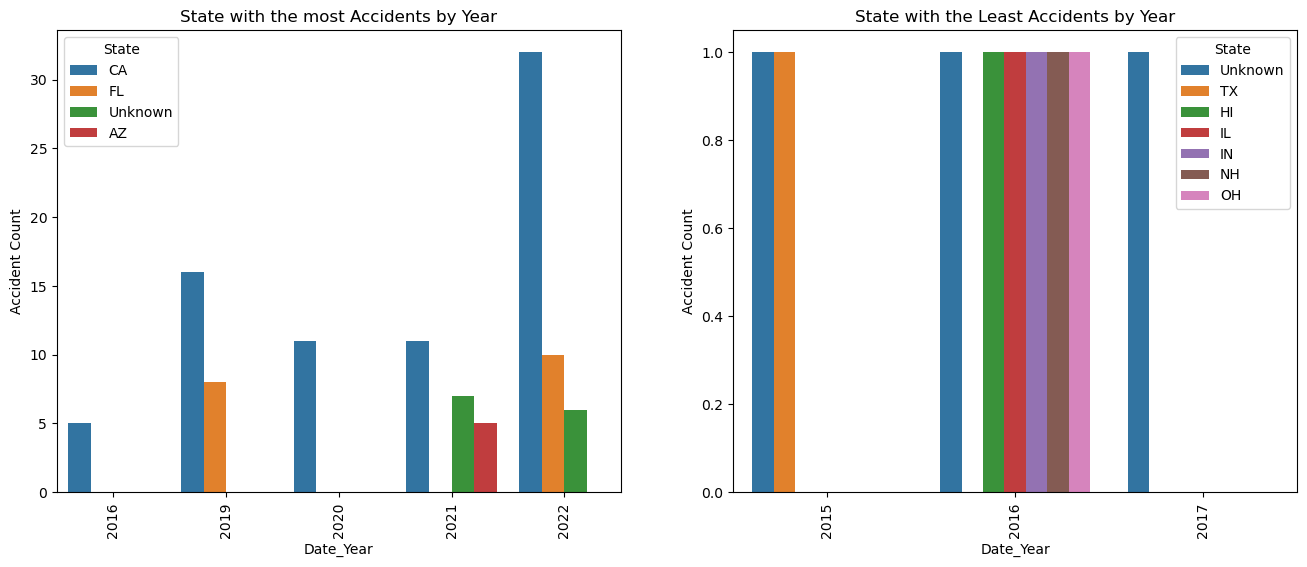

In [105]:
event_counts = data.groupby(['Date_Year', 'Country', 'State']).size().reset_index(name='Accident_Count')
plot_highest_lowest(event_counts, 'Date_Year', 'Accident_Count', 'State with the most Accidents by Year', 'State with the Least Accidents by Year' ,'Date_Year', 'Accident Count','State')


CA is the State with most accident, across different years. One of the States is marked as Unknow, since that data is not available to us. There are quite a few states with fewer accidents.

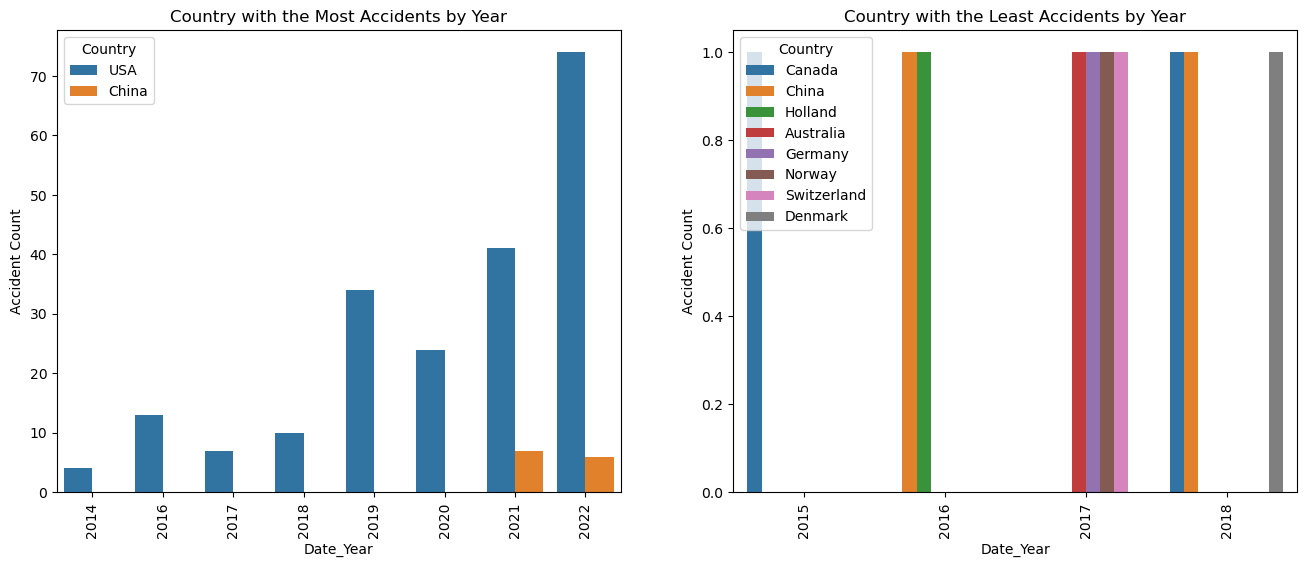

In [106]:
event_counts = data.groupby(['Date_Year', 'Country']).size().reset_index(name='Accident_Count')
plot_highest_lowest(event_counts, 'Date_Year', 'Accident_Count', 'Country with the Most Accidents by Year', 'Country with the Least Accidents by Year' ,'Date_Year', 'Accident Count','Country')


From above it is clear that USA has the most number of accidents, across years. There are a number of countries with few accidents.

### b. Analyze the different aspects of the death events.

In [56]:
data.head()

,Date,Country,State,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Date_Day,Date_Month,Date_Year
0,2023-01-17,USA,CA,1.0,1,-1,-1,-1,1,-1,-1,-1,-1,17,1,2023
1,2023-01-07,Canada,Unknown,1.0,1,-1,-1,-1,1,-1,-1,-1,-1,7,1,2023
2,2023-01-07,USA,WA,1.0,-1,1,-1,-1,1,-1,-1,-1,-1,7,1,2023
3,2022-12-22,USA,GA,1.0,1,-1,-1,-1,1,-1,-1,-1,-1,22,12,2022
4,2022-12-19,Canada,Unknown,1.0,-1,-1,-1,1,1,-1,-1,-1,-1,19,12,2022


#### What is the number of victims (deaths) in each accident

<Figure size 600x400 with 0 Axes>

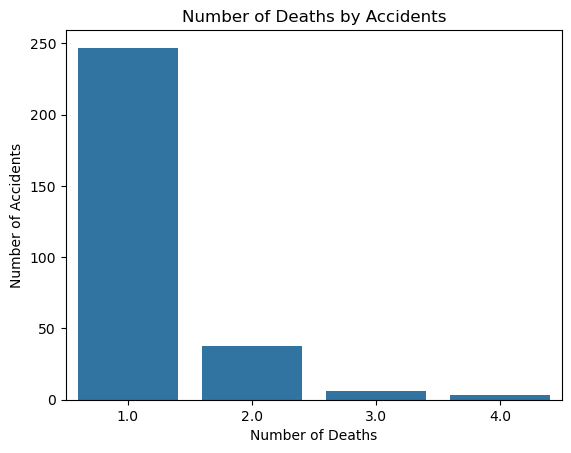

<Figure size 600x400 with 0 Axes>

In [109]:
sns.countplot(x='Deaths', data=data)    
plt.title('Number of Deaths by Accidents')
plt.xlabel('Number of Deaths')
plt.ylabel('Number of Accidents')
plt.figure(figsize=(6, 4))

From above it is clear that in most accidents it is a single Death. 

#### How many times did tesla drivers die?

<Figure size 600x400 with 0 Axes>

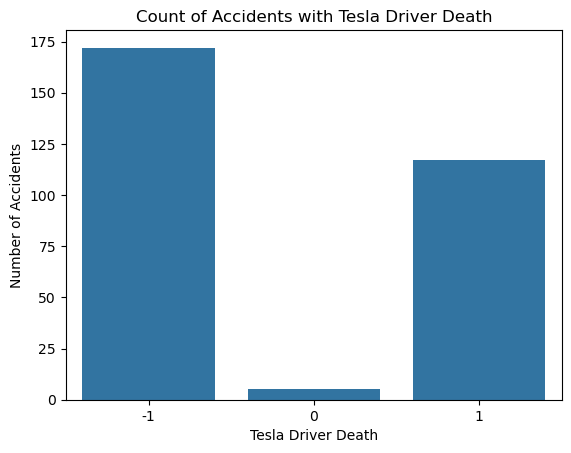

<Figure size 600x400 with 0 Axes>

In [110]:
sns.countplot(x='Tesla driver', data=data)
plt.title('Count of Accidents with Tesla Driver Death')
plt.xlabel('Tesla Driver Death')
plt.ylabel('Number of Accidents')  
plt.figure(figsize=(6, 4))

There are quite a few accidents which have resulted in Tesla Driver's death

#### What is the proportion of events in which one or more occupants died?

<Figure size 400x400 with 0 Axes>

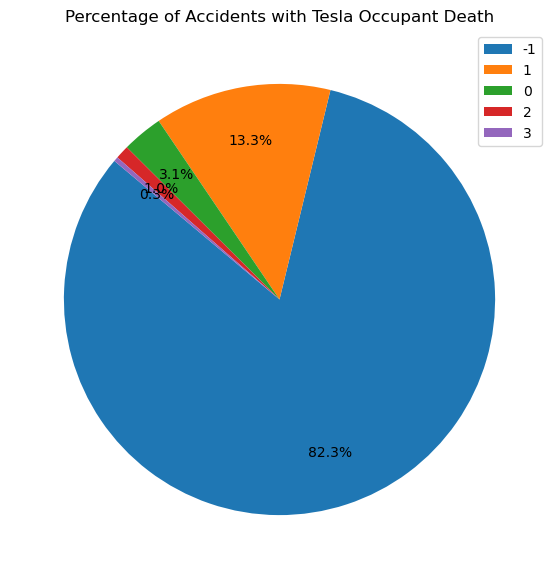

<Figure size 400x400 with 0 Axes>

In [112]:
counts = data['Tesla occupant'].value_counts().reset_index()
counts.columns = ['Tesla occupant', 'count']
plt.figure(figsize=(7,7))
plt.pie(counts['count'],  labels=None, autopct='%1.1f%%', startangle=140,pctdistance= 0.75 )
plt.title('Percentage of Accidents with Tesla Occupant Death')
plt.legend(counts['Tesla occupant'])
plt.figure(figsize=(4, 4))


From above we can see that 85.4% of the cases, had no Tesla occupant deaths. However 13.3 cases had 1 death.

Tesla occupants have died in a few cases. 

#### What is the distribution of events in which the vehicle hit a cyclist or a pedestrian?

<Figure size 600x400 with 0 Axes>

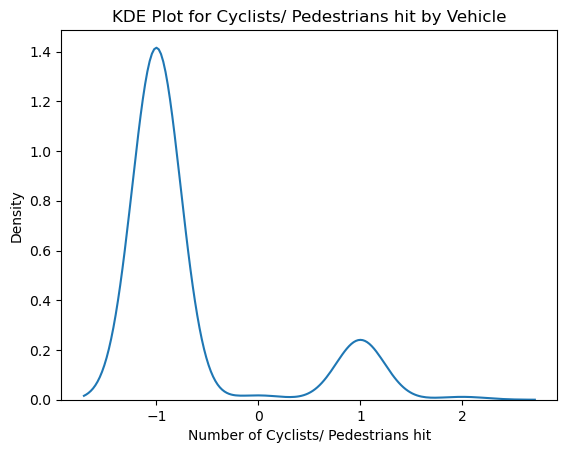

<Figure size 600x400 with 0 Axes>

In [113]:
sns.kdeplot(data['Cyclists/ Peds'])
plt.title('KDE Plot for Cyclists/ Pedestrians hit by Vehicle')
plt.xlabel('Number of Cyclists/ Pedestrians hit')
plt.ylabel('Density')
plt.figure(figsize=(6, 4))

From the KDE plot it is clear that in most cases NO cyclists or pedestrians were hit by the vehicle. In few cases 1 was hit.

#### How many times did the accident involve the death of an occupant or driver of a Tesla along with a cyclist or pedestrian?

In [58]:
df_filtered = data[((data['Tesla driver'] == 1) | (data['Tesla occupant'] > 0) ) & (data['Cyclists/ Peds'] > 0)]
df_filtered.reset_index(drop=True)
#df_filtered[df_filtered['Cyclists/ Peds'] > 0]

,Date,Country,State,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Date_Day,Date_Month,Date_Year
0,2021-09-04,USA,FL,2.0,-1,1,-1,1,2,S,-1,-1,-1,4,9,2021


There is only one accident which happened on 2021-09-04, where there was a death of a Tesla occupant and that of the Cyclist/Pedestrian.

#### What is the frequency of Tesla colliding with other vehicles?

<Figure size 600x400 with 0 Axes>

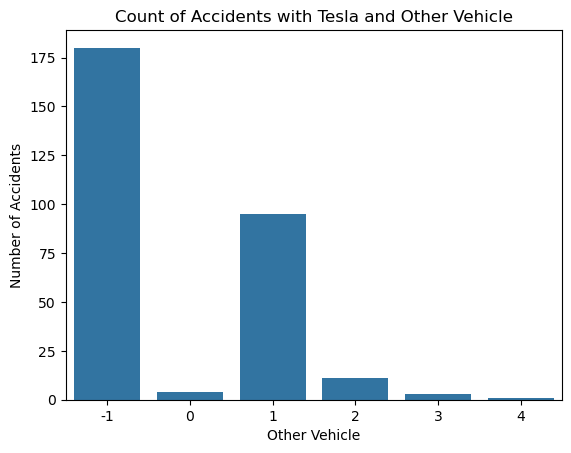

<Figure size 600x400 with 0 Axes>

In [114]:
sns.countplot(data=data, x='Other vehicle')
plt.title('Count of Accidents with Tesla and Other Vehicle')
plt.xlabel('Other Vehicle')
plt.ylabel('Number of Accidents')
plt.figure(figsize=(6, 4))

As we can see, at least 100 accidents had 1 vehicle involved. Cases where 2 or 3 or 4 vehicles are involved are relatively fewer.

## c. Study the event distribution across models

<Figure size 400x400 with 0 Axes>

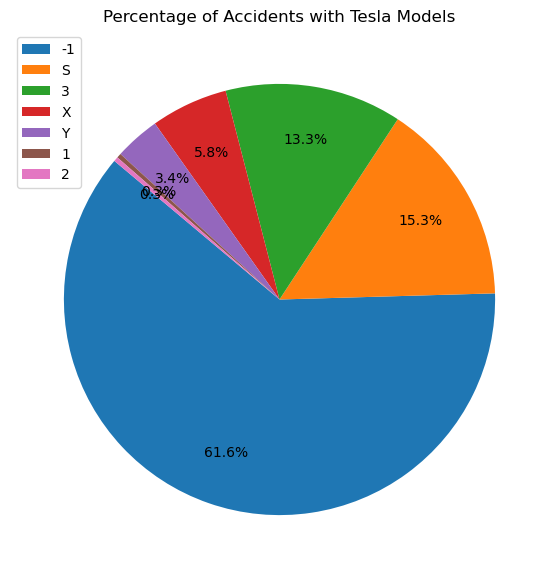

<Figure size 400x400 with 0 Axes>

In [115]:
#Pie  plot for Model
counts = data['Model'].value_counts().reset_index()
counts.columns = ['Model', 'count']
plt.figure(figsize=(7,7))
plt.pie(counts['count'],  labels=None, autopct='%1.1f%%', startangle=140,pctdistance= 0.75 )
plt.title('Percentage of Accidents with Tesla Models')
plt.legend(counts['Model'])
plt.figure(figsize=(4, 4))

-1 indicates the model is Unknown. Most accidents have occured with the Unknown model. This is followed by model S, 3, X, Y,2, and 1.

<Figure size 600x400 with 0 Axes>

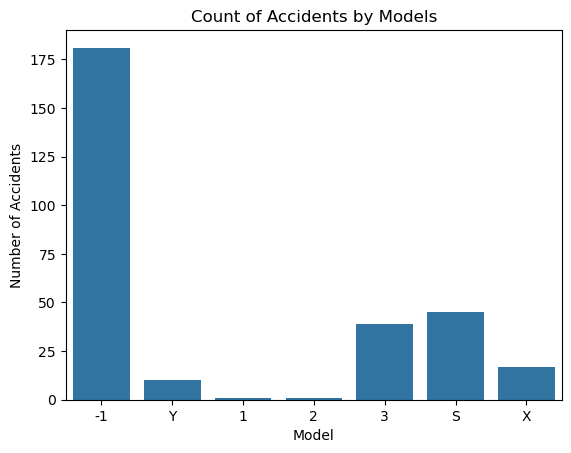

<Figure size 600x400 with 0 Axes>

In [116]:
sns.countplot(data=data, x='Model')
plt.title('Count of Accidents by Models')
plt.xlabel('Model')
plt.ylabel('Number of Accidents')
plt.figure(figsize=(6, 4))

The Model with the most accidents, is Unknown (-1)

### d. Check the distribution of verified Tesla autopilot deaths

In [70]:
data.head()

,Date,Country,State,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Date_Day,Date_Month,Date_Year
0,2023-01-17,USA,CA,1.0,1,-1,-1,-1,1,-1,-1,-1,-1,17,1,2023
1,2023-01-07,Canada,Unknown,1.0,1,-1,-1,-1,1,-1,-1,-1,-1,7,1,2023
2,2023-01-07,USA,WA,1.0,-1,1,-1,-1,1,-1,-1,-1,-1,7,1,2023
3,2022-12-22,USA,GA,1.0,1,-1,-1,-1,1,-1,-1,-1,-1,22,12,2022
4,2022-12-19,Canada,Unknown,1.0,-1,-1,-1,1,1,-1,-1,-1,-1,19,12,2022


<Figure size 600x400 with 0 Axes>

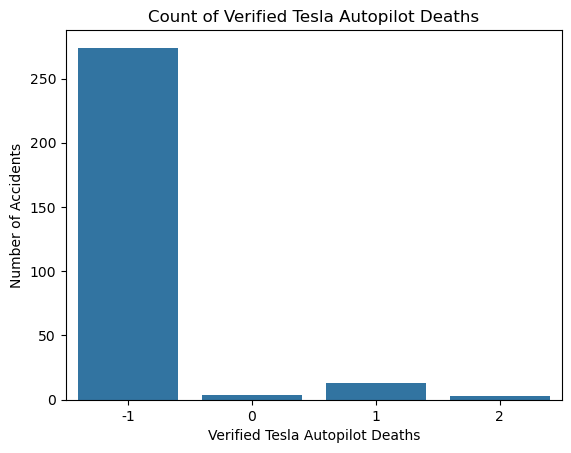

<Figure size 600x400 with 0 Axes>

In [117]:
sns.countplot(x='Verified Tesla Autopilot Deaths', data=data)
plt.title('Count of Verified Tesla Autopilot Deaths')
plt.xlabel('Verified Tesla Autopilot Deaths')
plt.ylabel('Number of Accidents')
plt.figure(figsize=(6, 4))

As we can see above there are around 12-13 Verified Tesla Single Deaths, and in very few cases there have been 2 deaths verified.

<Figure size 600x400 with 0 Axes>

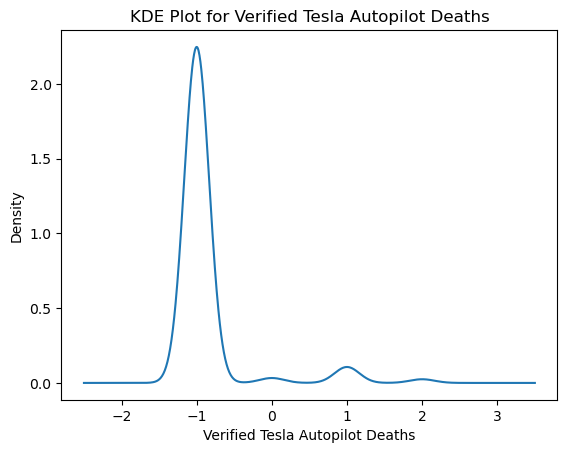

<Figure size 600x400 with 0 Axes>

In [118]:
data['Verified Tesla Autopilot Deaths'].plot(kind='kde')
plt.title('KDE Plot for Verified Tesla Autopilot Deaths')
plt.xlabel('Verified Tesla Autopilot Deaths')
plt.ylabel('Density')
plt.figure(figsize=(6, 4))

-1 above indicates Unknown. And as shown in the above count plot there are a few single Verified Tesla Autopilot deaths.

## Conclusion

#### Based on the above analysis, the following conclusions can be drawn:

- The Dataset contained a lot of "-" which is basically Unknown, and has been marked as -1.
- The column names and the values had extra begining and trailing spaces, which were removed.
- In some of the rows, the Year did not match the Date (Year) field. Hence Year was dropped and instead Date_Year column was added to get the Year from the Date field.
- Most accidents occured in the year 2022
- Most accidents occured in CA, USA.
- Most accidents occured for Tesla Model -1 (which is basically Unknown)